# Project 

## BDA 104: Predictive Modelling & Data Mining

## Due Date: July 25, 2020 

## Author: Marek Brzozowski

## Theme: Fraudulent Credit Card Prediction

In [40]:
# Importing Libraries and Packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import time

from sklearn.decomposition import PCA, TruncatedSVD



# Classifiers
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Other Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, log_loss,r2_score, confusion_matrix
from sklearn.feature_selection import RFE

In [26]:
# Variables
split = 20
random = 31

In [27]:
# Importing Dataset
raw = pd.read_csv('creditcard.csv')
raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
print('Total Nulls: ',raw.isnull().sum().sum())
print('Number of Rows and Columns: ',raw.shape)

Total Nulls:  0
Number of Rows and Columns:  (284807, 31)


In [29]:
print('Column Types:\n',raw.dtypes)

Column Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [30]:
duplicates = raw[raw.duplicated()]
print('Number of rows that are duplicates: ',len(duplicates))

Number of rows that are duplicates:  1081


In [31]:
data = raw.copy()
data = data.drop(duplicates.index)

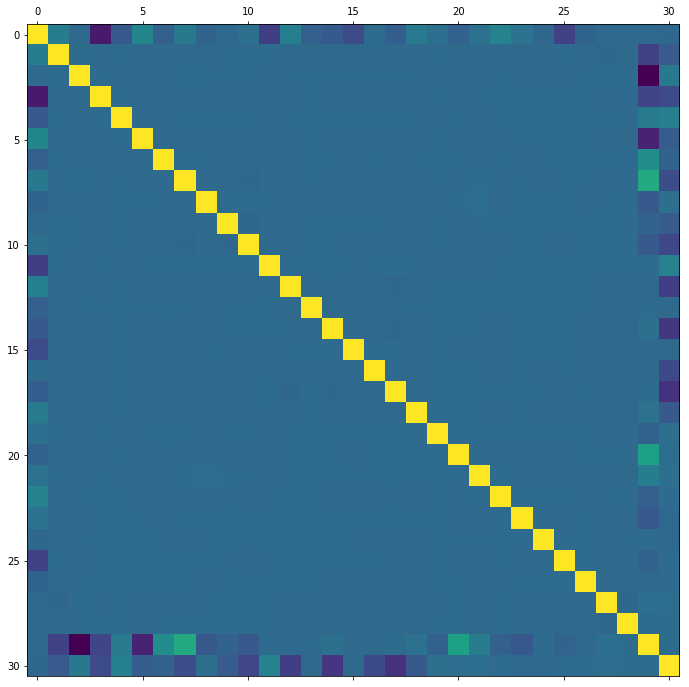

In [32]:
def plot_corr(df,size=12):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe. '''
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    
plot_corr(data)

In [33]:
feature = data.copy()
target = feature.iloc[:,-1]
features = feature.drop(columns=['Class'],axis=1)


In [34]:
print(
    'The Actual Number of Fraudulent Claims: %0.0f ' 
    '\tTotal Transaction %0.0f '
    '\tPercentage of Fraud Claims %0.2f%%' 
    % (
        target.sum(),
        len(target),
        target.sum()/len(target)*100
        )
    )

The Actual Number of Fraudulent Claims: 473 	Total Transaction 283726 	Percentage of Fraud Claims 0.17%


In [35]:
feature_train, feature_test , target_train, target_test = train_test_split(features,target, test_size = split, random_state = random)

Heavy Onesidness need to use different accuracy measures.

In [36]:
def linear_regression(predict_train, predict_test, target_train, target_test):

    linear_model = LinearRegression()

    linear_regression = linear_model.fit(predict_train,target_train)
    print("Linear Regression Training Score: ",linear_regression.score(predict_train,target_train))
    print("Linear Regression Testing Score: ",linear_regression.score(predict_test,target_test))


    predicted_test = linear_regression.predict(predict_test)

    print('\nLinear Regression Testing Score (R^2 Score): ',r2_score(predicted_test,target_test),'\n')

    best_estimator = RFE(linear_model, n_features_to_select= 150)
    best_estimator.fit(predict_train,target_train)
    print('\nLinear RFE Train score: ', best_estimator.score(predict_train,target_train))
    print('Linear RFE Test score: ', best_estimator.score(predict_test,target_test))

In [37]:
def logistic_regression(predict_train, predict_test, target_train, target_test):
    
    log_model = LogisticRegression()

    logistic_regression = log_model.fit(predict_train,target_train)
    print("\nLogistic Regression Training Score: ",logistic_regression.score(predict_train,target_train))
    print("Logistic Regression Testing Score: ",logistic_regression.score(predict_test,target_test))

    predicted_test = logistic_regression.predict(predict_test)

    print('\Logistic Regression Testing Score (R^2 Score): ',r2_score(predicted_test,target_test),'\n')

    best_estimator = RFE(log_model, n_features_to_select= 150)
    best_estimator.fit(predict_train,target_train)
    print('\nLogistic RFE Train score: ', best_estimator.score(predict_train,target_train))
    print('Logistic RFE Test score: ', best_estimator.score(predict_test,target_test))

In [38]:
def decision_tree(predict_train, predict_test, target_train, target_test):

    clf = tree.DecisionTreeClassifier()
    parameters = {'max_features': ['log2', 'sqrt','auto'], 
                        'criterion': ['entropy', 'gini'],
                        'max_depth': [2, 3, 5, 10], 
                        'min_samples_split': [2, 3, 5],
                        'min_samples_leaf': [1,5,8]
                }

    grid_obj = GridSearchCV(clf, parameters, cv=5)
    grid_obj = grid_obj.fit(predict_train,target_train)
    clf = grid_obj.best_estimator_
    clf.fit(predict_train,target_train)

    print('Decision Tree Accuracy score for Training: ',clf.score(predict_train,target_train))

    predicted_test = clf.predict(predict_test)
    
    print("\nDecision Tree Accuracy Score for Testing: ",accuracy_score(predicted_test,target_test))

    cm = confusion_matrix(predicted_test,target_test)
    sb.heatmap(cm, annot=True)
    plt.show()

In [41]:
linear_regression(feature_train, feature_test, target_train, target_test)

Linear Regression Training Score:  0.5064785284570794
Linear Regression Testing Score:  0.0

Linear Regression Testing Score (R^2 Score):  -0.10581358226305038 


Linear RFE Train score:  0.5064785284570794
Linear RFE Test score:  0.0
